In [1]:
import pandas as pd
data = pd.read_csv('/content/TelecomCustomerChurn.csv', low_memory=False)
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Convert the 'Churn' column: Yes = 1, No = 0
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert other categorical columns to numerical data using pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the transformed dataset
print(data.head())

   SeniorCitizen  Tenure  MonthlyCharges  Churn  customerID_0003-MKNFE  \
0              0       1           29.85      0                  False   
1              0      34           56.95      0                  False   
2              0       2           53.85      1                  False   
3              0      45           42.30      0                  False   
4              0       2           70.70      1                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  TotalCharges_995.35  \
0                  False         

In [4]:
# Split the data into training and testing sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict the values
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Display the coefficients
print(pd.DataFrame(log_reg.coef_, columns=X.columns))

   SeniorCitizen    Tenure  MonthlyCharges  customerID_0003-MKNFE  \
0       0.189295 -0.033468        0.003662               -0.30505   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0               0.263936               0.200504               0.224107   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0               -0.23276               -0.03266              -0.026842  ...   

   TotalCharges_995.35  TotalCharges_996.45  TotalCharges_996.85  \
0            -0.318145                  0.0            -0.369452   

   TotalCharges_996.95  TotalCharges_997.65  TotalCharges_997.75  \
0            -0.020346                  0.0                  0.0   

   TotalCharges_998.1  TotalCharges_999.45  TotalCharges_999.8  \
0           -0.010381             0.244355           -0.383089   

   TotalCharges_999.9  
0           -0.379736  

[1 rows x 13593 columns]


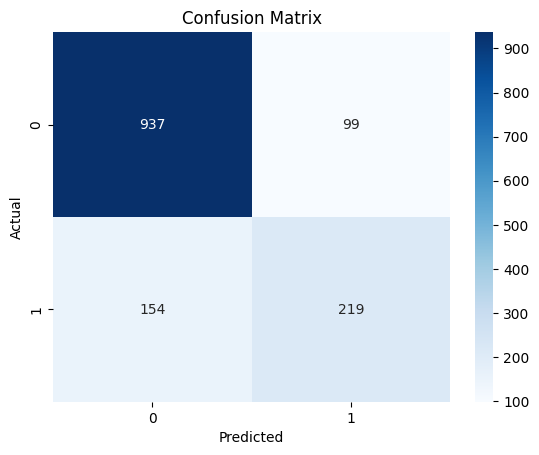

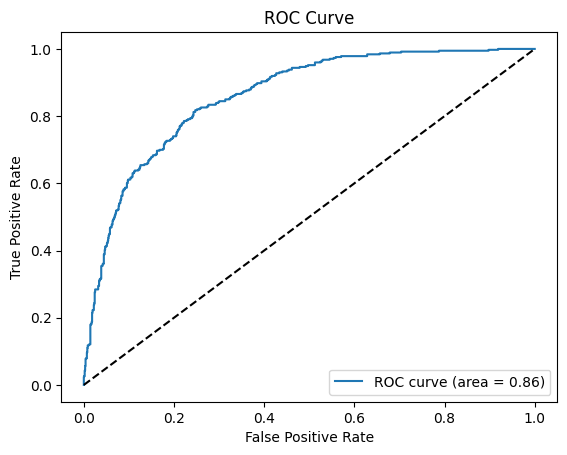

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Calculate precision, recall, and F1 score for logistic regression
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision (Logistic Regression): {precision:.2f}')
print(f'Recall (Logistic Regression): {recall:.2f}')
print(f'F1 Score (Logistic Regression): {f1:.2f}')

Accuracy: 0.82
Precision (Logistic Regression): 0.69
Recall (Logistic Regression): 0.59
F1 Score (Logistic Regression): 0.63


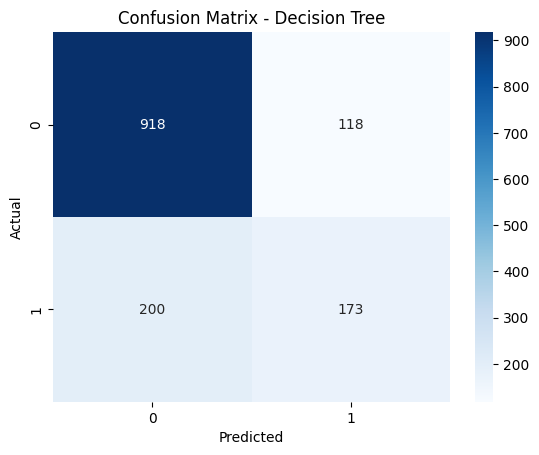

Accuracy (Decision Tree): 0.77


In [11]:
# Fit the decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict the values
y_tree_pred = tree_clf.predict(X_test)

# Confusion matrix for decision tree
conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy for decision tree
accuracy_tree = accuracy_score(y_test, y_tree_pred)
print(f'Accuracy (Decision Tree): {accuracy_tree:.2f}')

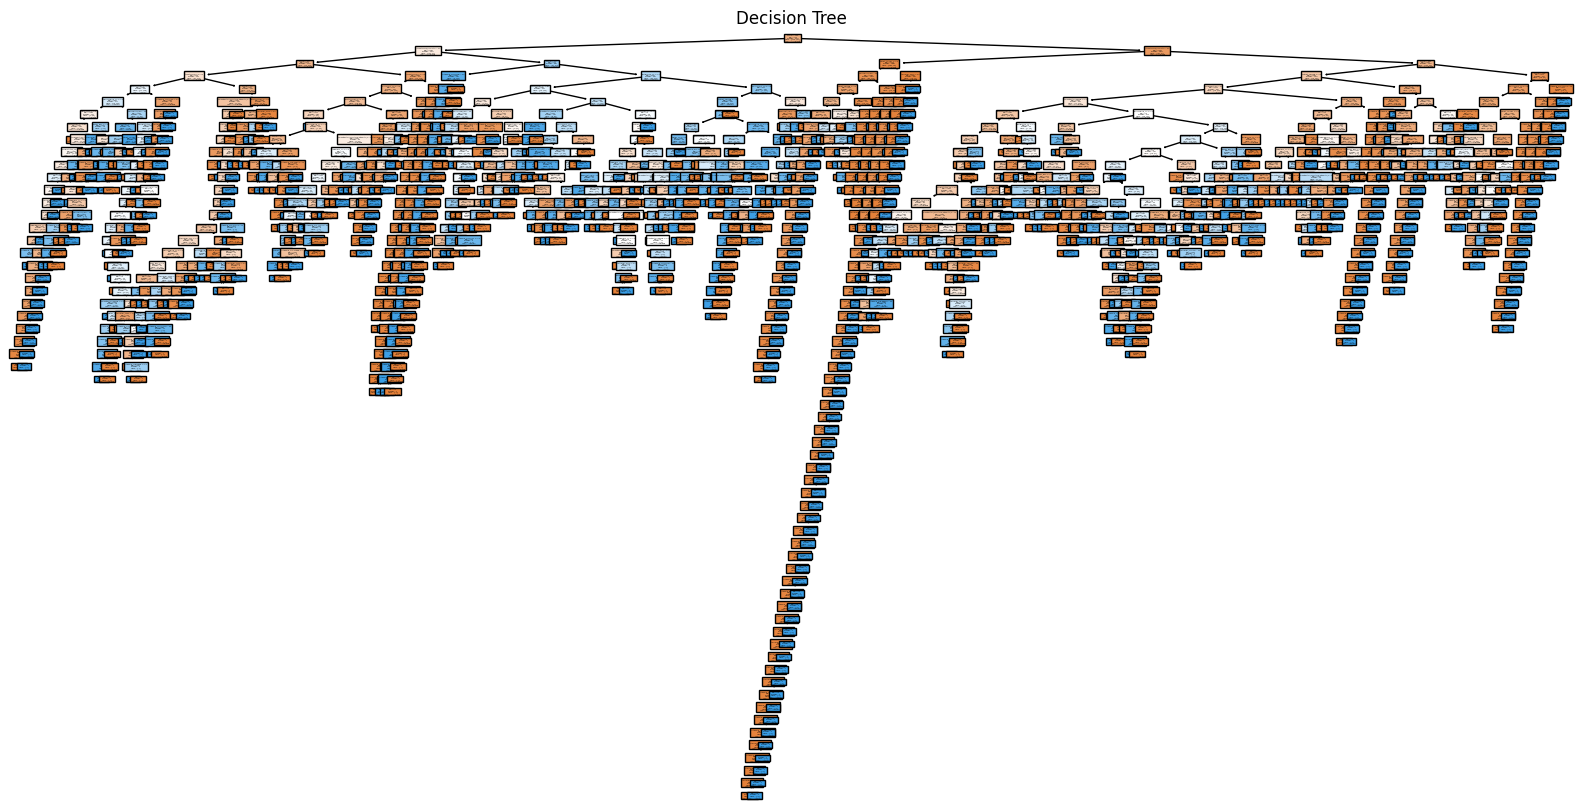

In [14]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Unacceptable', 'Acceptable'])
plt.title('Decision Tree')
plt.show()